In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Set-up environment

In [ ]:
import os
PATH_TO_FOLDER = '/content/drive/MyDrive/2024/Projects/IDS/supervision/KEN4131/Team 16 - Tab Anno'
os.chdir(PATH_TO_FOLDER)

In [ ]:
os.listdir()

['Student Master Projects 2024 - ShervinMehryar.gdoc',
 'presentations',
 'reports',
 'Project Plan - Team 16 TA.gsheet',
 'data',
 'code',
 'papers']

In [ ]:
import pandas as pd
import pickle
from matplotlib import pyplot as plt

In [ ]:
data_path = './data/'

### Load Prescriptions.csv

In [ ]:
# Load the list of Cardiovascular Admissions IDs
with open(data_path+'list_of_cvd_hadm.pk','rb') as f:
    cv_hadm_id_list = pickle.load(f)

In [ ]:
def load_mimic_table_by_name(path,filename):
# Helper function to load a pandas dataframe based on extention

    if filename.split('.')[-1] == 'csv':
        df = pd.read_csv(path+filename)
    else:
        df = pd.read_csv(path+filename,compression = 'gzip')

    return df


### Clean Data

In [ ]:
df = load_mimic_table_by_name(data_path,'PRESCRIPTIONS.csv')

In [ ]:
# view columns
df.columns

Index(['row_id', 'subject_id', 'hadm_id', 'icustay_id', 'startdate', 'enddate',
       'drug_type', 'drug', 'drug_name_poe', 'drug_name_generic',
       'formulary_drug_cd', 'gsn', 'ndc', 'prod_strength', 'dose_val_rx',
       'dose_unit_rx', 'form_val_disp', 'form_unit_disp', 'route'],
      dtype='object')

In [ ]:
# Select a subset of patients records related to Cardiovascular admissions
df__cvd_subset = df[df['hadm_id'].isin(cv_hadm_id_list)] # new dataframe
list_of_patients = list(df__cvd_subset['subject_id'].unique())

In [ ]:
patient_id = list_of_patients[0] # select one patient

In [ ]:
patient_id

43735

In [ ]:
# Extract records for the patient
df_per_patient = df__cvd_subset[df__cvd_subset['subject_id'] == patient_id]

# Choose relevant columns
selected_columns = ['hadm_id','icustay_id','drug_type','drug','prod_strength','dose_val_rx','dose_unit_rx','form_val_disp','route']

# Write records to patient's folder
df_per_patient[selected_columns].to_csv(data_path+'patients/'+str(patient_id)+'/drug_raw.csv' )

In [ ]:
df_per_patient.head(10)

,row_id,subject_id,hadm_id,icustay_id,startdate,enddate,drug_type,drug,drug_name_poe,drug_name_generic,formulary_drug_cd,gsn,ndc,prod_strength,dose_val_rx,dose_unit_rx,form_val_disp,form_unit_disp,route
35,86431,43735,112662,NaN,2128-11-04 00:00:00,2128-11-09 00:00:00,MAIN,Pneumococcal Vac Polyvalent,Pneumococcal Vac Polyvalent,PNEUMOcoccal Vac Polyvalent,PNEU25I,48548.0,6.494300e+06,25mcg/0.5mL Vial,0.5,mL,1,VIAL,IM
36,86432,43735,112662,NaN,2128-11-04 00:00:00,2128-11-09 00:00:00,MAIN,Heparin Flush (10 units/ml),Heparin Flush (10 units/ml),Heparin Flush (10 Units/mL),HEPA10SYR,60304.0,8.290036e+09,10 Units/mL - 5 mL Syringe,1,mL,0.2,SYR,IV
37,86433,43735,112662,NaN,2128-11-04 00:00:00,2128-11-09 00:00:00,MAIN,Multivitamins,Multivitamins,Multivitamins,MVI,2532.0,9.040531e+08,1 Tablet,1,TAB,1,TAB,PO
38,86434,43735,112662,NaN,2128-11-04 00:00:00,2128-11-09 00:00:00,MAIN,Ferrous Sulfate,Ferrous Sulfate,Ferrous Sulfate,FERR325,1645.0,1.824029e+08,325 mg Tablet,325,mg,1,TAB,PO
39,86435,43735,112662,NaN,2128-11-04 00:00:00,2128-11-09 00:00:00,MAIN,Ipratropium Bromide Neb,Ipratropium Bromide Neb,Ipratropium Bromide Neb,IPRA2H,21700.0,4.879801e+08,2.5mL Vial,1,NEB,1,VIAL,IH
40,86436,43735,112662,NaN,2128-11-04 00:00:00,2128-11-09 00:00:00,MAIN,Albuterol 0.083% Neb Soln,Albuterol 0.083% Neb Soln,Albuterol 0.083% Neb Soln,ALBU3H,5039.0,4.950207e+10,0.083%;3mL Vial,1,NEB,1,VIAL,IH
41,86571,43735,112662,NaN,2128-11-04 00:00:00,2128-11-09 00:00:00,MAIN,Sertraline,Sertraline,Sertraline,SERT100,46228.0,9.045868e+08,100mg Tablet,100,mg,1,TAB,PO
42,86572,43735,112662,NaN,2128-11-04 00:00:00,2128-11-09 00:00:00,MAIN,Simvastatin,Simvastatin,Simvastatin,SIMV40,16579.0,5.107905e+10,40mg Tablet,80,mg,2,TAB,PO
43,86573,43735,112662,NaN,2128-11-04 00:00:00,2128-11-09 00:00:00,MAIN,Levothyroxine Sodium,Levothyroxine Sodium,Levothyroxine Sodium,LEVO100,6651.0,7.466241e+07,100mcg Tablet,200,mcg,2,TAB,PO
44,86574,43735,112662,NaN,2128-11-04 00:00:00,2128-11-09 00:00:00,MAIN,Allopurinol,Allopurinol,Allopurinol,ALLO100,2535.0,5.107902e+10,100mg Tab,100,mg,1,TAB,PO


### Analyze Data

Let's visualize the drugs and dosages administred to a single patient and draw patterns for insight?

In [ ]:
df_43735 = df_per_patient[df_per_patient['subject_id'] == 43735]

array([[<Axes: title={'center': 'counts'}>]], dtype=object)

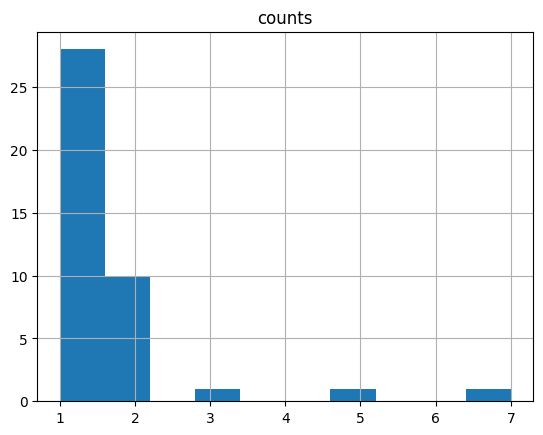

In [ ]:
df_43735.groupby(['drug']).size().reset_index(name='counts').hist()